In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('cleaned_ethereum_fraud_data.csv')
data2 = pd.read_csv('engineered_extended.csv')

In [ ]:
len(data)

4884

In [ ]:
len(data2)

21987

In [2]:
from sklearn.model_selection import train_test_split

y = data['fraud_label']
X = data.drop('fraud_label',axis=1)

# Train 80%
# Validation 10%
# Test 10%

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None if y is None else y # Use stratify for classification tasks if needed
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=None if y_temp is None else y_temp # Use stratify for classification tasks if needed
)




In [3]:
from sklearn.model_selection import train_test_split

y_eng = data2['fraud_label']
X_eng = data2.drop('fraud_label',axis=1)

# Train 80%
# Validation 10%
# Test 10%

X_train_eng, X_temp, y_train_eng, y_temp = train_test_split(
    X_eng, y_eng, test_size=0.2, random_state=42, stratify=None if y_eng is None else y_eng # Use stratify for classification tasks if needed
)

X_val_eng, X_test_eng, y_val_eng, y_test_eng = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=None if y_temp is None else y_temp # Use stratify for classification tasks if needed
)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

--- Training Logistic Regression ---
--- Evaluating Logistic Regression on Validation Set ---

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       244
           1       1.00      0.35      0.52       244

    accuracy                           0.68       488
   macro avg       0.80      0.68      0.64       488
weighted avg       0.80      0.68      0.64       488



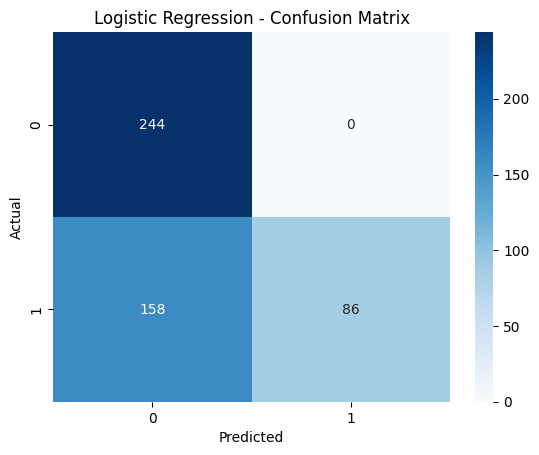


ROC AUC Score for Logistic Regression: 0.7623
Precision-Recall AUC Score for Logistic Regression: 0.8060
--- Training Support Vector Machine ---
--- Evaluating Support Vector Machine on Validation Set ---

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.77      0.30      0.43       244
           1       0.56      0.91      0.70       244

    accuracy                           0.60       488
   macro avg       0.67      0.60      0.56       488
weighted avg       0.67      0.60      0.56       488



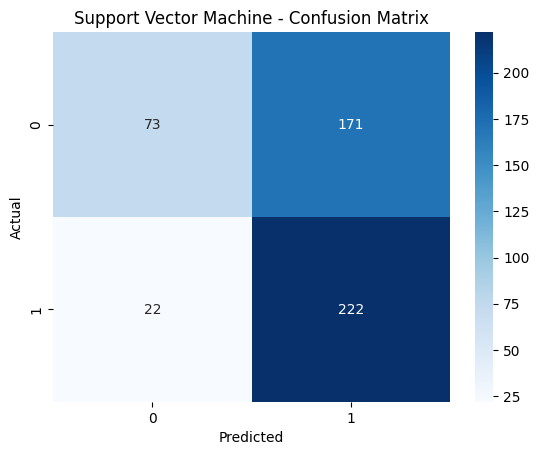


ROC AUC Score for Support Vector Machine: 0.5902
Precision-Recall AUC Score for Support Vector Machine: 0.5287
--- Training Random Forest ---
--- Evaluating Random Forest on Validation Set ---

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       244
           1       0.91      0.82      0.87       244

    accuracy                           0.87       488
   macro avg       0.88      0.87      0.87       488
weighted avg       0.88      0.87      0.87       488



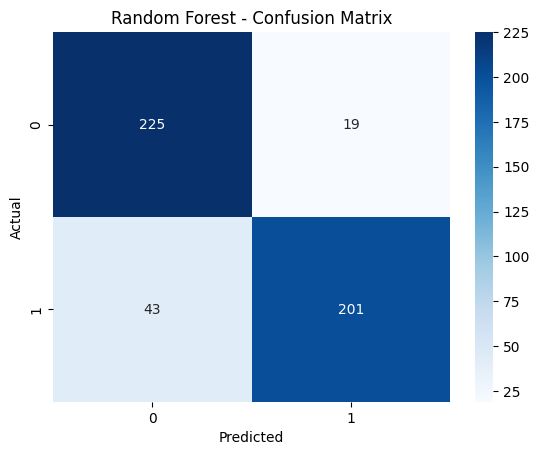


ROC AUC Score for Random Forest: 0.9498
Precision-Recall AUC Score for Random Forest: 0.9516
--- Training K-Nearest-Neighbors ---
--- Evaluating K-Nearest-Neighbors on Validation Set ---

Classification Report for K-Nearest-Neighbors:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       244
           1       0.83      0.77      0.80       244

    accuracy                           0.81       488
   macro avg       0.81      0.81      0.81       488
weighted avg       0.81      0.81      0.81       488



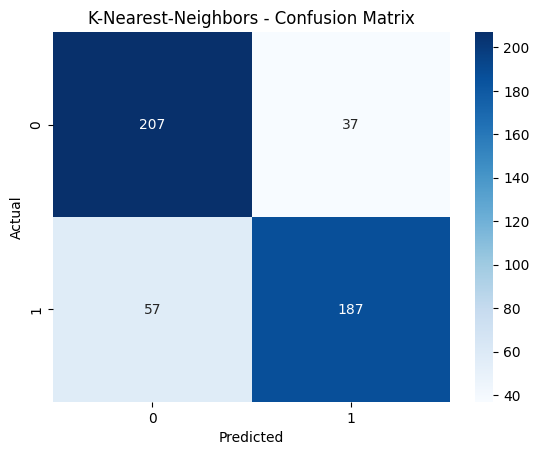


ROC AUC Score for K-Nearest-Neighbors: 0.8905
Precision-Recall AUC Score for K-Nearest-Neighbors: 0.9054
--- Training XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:44:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Evaluating XGBoost on Validation Set ---

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       244
           1       0.91      0.86      0.88       244

    accuracy                           0.89       488
   macro avg       0.89      0.89      0.89       488
weighted avg       0.89      0.89      0.89       488



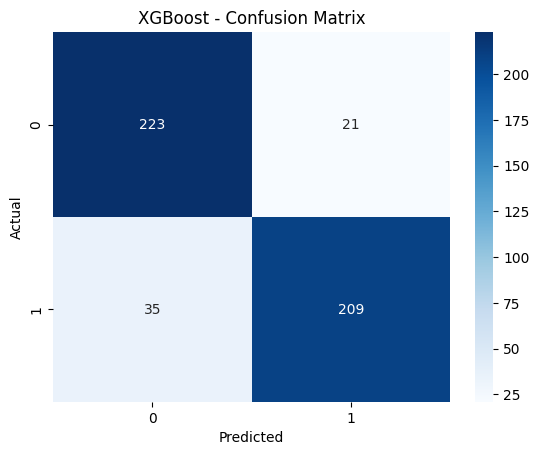


ROC AUC Score for XGBoost: 0.9641
Precision-Recall AUC Score for XGBoost: 0.9655


In [ ]:
# 1. Initialize Models
# Initialize the classifiers with default parameters or specify parameters as needed.
# random_state is set for reproducibility.
logistic_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence if needed
svm_model = SVC(random_state=42, probability=True) # probability=True needed for ROC AUC but slows training
rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # n_estimators is a common parameter to tune

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()), # Step 1: Scale the data
    ('knn', KNeighborsClassifier(n_neighbors=5)) # Step 2: Apply KNN
])

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # For binary fraud classification
    random_state=42,
    use_label_encoder=False, # Recommended practice
    eval_metric='logloss' # Common eval metric for binary classification
)

models = {
    "Logistic Regression": logistic_model,
    "Support Vector Machine": svm_model,
    "Random Forest": rf_model,
    "K-Nearest-Neighbors" :knn_pipeline,
    "XGBoost" : xgb_model
}



# Dictionary to store evaluation results
results = {}

# 2. Train and Evaluate Each Model
for name, model in models.items():
    print(f"--- Training {name} ---")
    # Train the model
    model.fit(X_train, y_train)
    print(f"--- Evaluating {name} on Validation Set ---")
    # Predict on the validation set
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1] # Probabilities for the positive class (fraud)

    # --- Evaluation Metrics ---
    # Classification Report (Precision, Recall, F1-Score)
    print(f"\nClassification Report for {name}:")
    report = classification_report(y_val, y_pred)
    print(report)

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC AUC Score
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    print(f"\nROC AUC Score for {name}: {roc_auc:.4f}")

    # Precision-Recall AUC Score
    precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
    pr_auc = auc(recall, precision)
    print(f"Precision-Recall AUC Score for {name}: {pr_auc:.4f}")

    # Store results
    results[name] = {
        'model': model, # Store the trained model object itself
        'classification_report': report,
        'confusion_matrix': cm,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc
    }


--- Training Logistic Regression ---
--- Evaluating Logistic Regression on Validation Set ---

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1466
           1       0.55      0.35      0.43       733

    accuracy                           0.69      2199
   macro avg       0.64      0.61      0.61      2199
weighted avg       0.67      0.69      0.67      2199



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


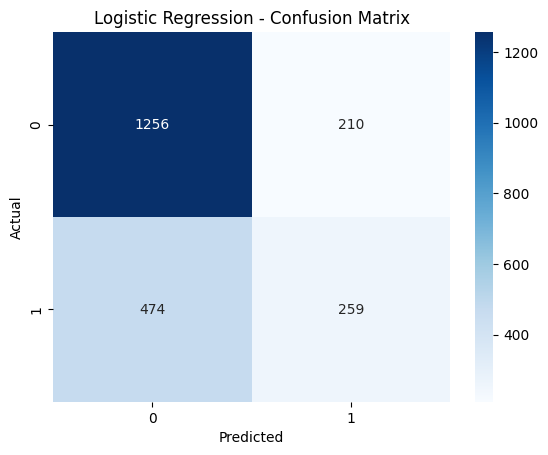


ROC AUC Score for Logistic Regression: 0.7320
Precision-Recall AUC Score for Logistic Regression: 0.5298
--- Training Support Vector Machine ---
--- Evaluating Support Vector Machine on Validation Set ---

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1466
           1       0.56      0.26      0.35       733

    accuracy                           0.69      2199
   macro avg       0.63      0.58      0.57      2199
weighted avg       0.66      0.69      0.65      2199



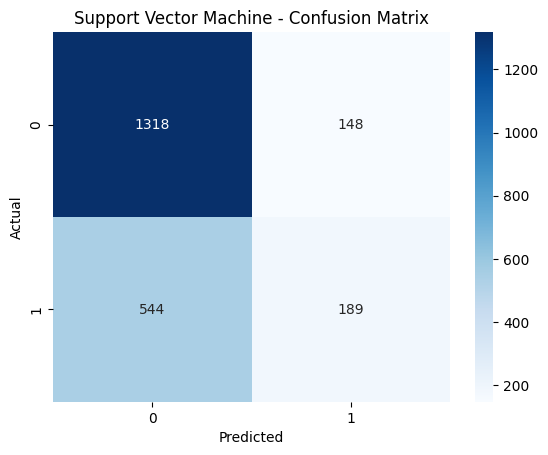


ROC AUC Score for Support Vector Machine: 0.6243
Precision-Recall AUC Score for Support Vector Machine: 0.4957
--- Training Random Forest ---
--- Evaluating Random Forest on Validation Set ---

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1466
           1       0.91      0.83      0.87       733

    accuracy                           0.91      2199
   macro avg       0.91      0.89      0.90      2199
weighted avg       0.91      0.91      0.91      2199



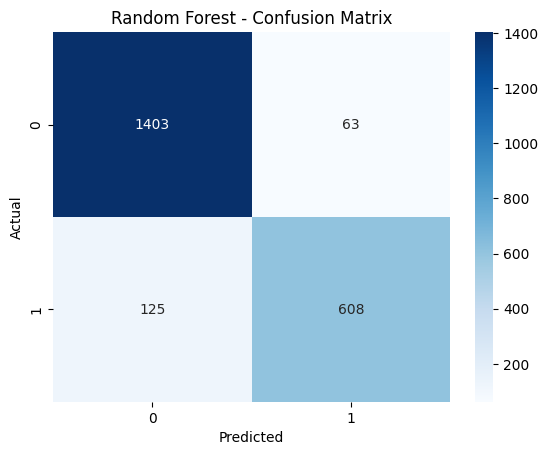


ROC AUC Score for Random Forest: 0.9713
Precision-Recall AUC Score for Random Forest: 0.9509
--- Training K-Nearest-Neighbors ---
--- Evaluating K-Nearest-Neighbors on Validation Set ---

Classification Report for K-Nearest-Neighbors:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1466
           1       0.87      0.75      0.80       733

    accuracy                           0.88      2199
   macro avg       0.88      0.85      0.86      2199
weighted avg       0.88      0.88      0.88      2199



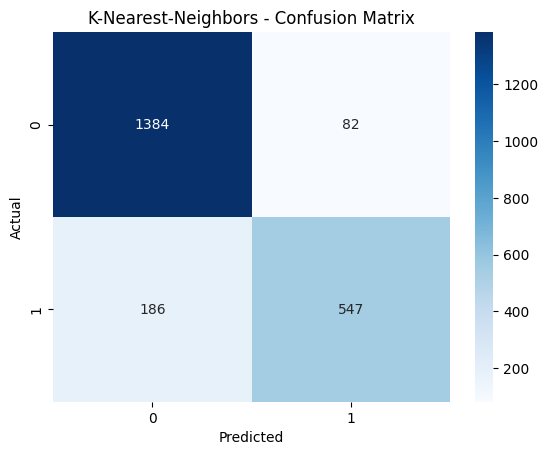


ROC AUC Score for K-Nearest-Neighbors: 0.9249
Precision-Recall AUC Score for K-Nearest-Neighbors: 0.8976
--- Training XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:47:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Evaluating XGBoost on Validation Set ---

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1466
           1       0.93      0.85      0.89       733

    accuracy                           0.93      2199
   macro avg       0.93      0.91      0.92      2199
weighted avg       0.93      0.93      0.93      2199



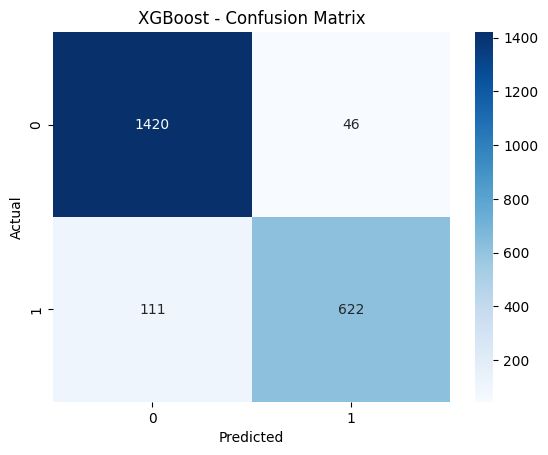


ROC AUC Score for XGBoost: 0.9801
Precision-Recall AUC Score for XGBoost: 0.9638


In [ ]:
# Dictionary to store evaluation results
results_eng = {}

# 2. Train and Evaluate Each Model
for name, model in models.items():
    print(f"--- Training {name} ---")
    # Train the model
    model.fit(X_train_eng, y_train_eng)
    print(f"--- Evaluating {name} on Validation Set ---")
    # Predict on the validation set
    y_pred_eng = model.predict(X_val_eng)
    y_pred_proba_eng = model.predict_proba(X_val_eng)[:, 1] # Probabilities for the positive class (fraud)

    # --- Evaluation Metrics ---
    # Classification Report (Precision, Recall, F1-Score)
    print(f"\nClassification Report for {name}:")
    report = classification_report(y_val_eng, y_pred_eng)
    print(report)

    # Confusion Matrix
    cm = confusion_matrix(y_val_eng, y_pred_eng)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC AUC Score
    roc_auc = roc_auc_score(y_val_eng, y_pred_proba_eng)
    print(f"\nROC AUC Score for {name}: {roc_auc:.4f}")

    # Precision-Recall AUC Score
    precision, recall, _ = precision_recall_curve(y_val_eng, y_pred_proba_eng)
    pr_auc = auc(recall, precision)
    print(f"Precision-Recall AUC Score for {name}: {pr_auc:.4f}")

    # Store results
    results_eng[name] = {
        'model': model, # Store the trained model object itself
        'classification_report': report,
        'confusion_matrix': cm,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc
    }


In [ ]:
# --- 1. Define Base Models and Parameter Grids ---

# Logistic Regression
# Note: 'l1' penalty requires 'liblinear' or 'saga' solver.
# Increased max_iter for potential convergence issues.
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100] # Regularization strength [1, 3]
    # 'solver': ['liblinear'] # Fixed solver that supports both l1/l2
}

# Support Vector Machine (SVC)
# Using Pipeline to scale data first, as SVM is sensitive to scaling
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42, probability=True)) # probability=True needed for ROC AUC
])
svm_params = {
    'svm__C': [0.1, 1, 10, 50],         # Regularization parameter [1, 3]
    'svm__kernel': ['rbf', 'linear'], # Kernel type [1, 3]
    'svm__gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf' [1, 3]
}

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],  # Number of trees [1, 3]
    'max_features': ['sqrt', 'log2'], # Number of features to consider at each split [1, 3]
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 3]        # Minimum samples required at each leaf node
}

# K-Nearest Neighbors (KNN)
# Using Pipeline with scaling
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11], # Number of neighbors
    'knn__weights': ['uniform', 'distance'], # Weight function
    'knn__metric': ['euclidean', 'manhattan'] # Distance metric
}

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # For binary fraud classification
    random_state=42,
    use_label_encoder=False, # Recommended practice
    eval_metric='logloss' # Common eval metric for binary classification
)
# Define parameter grid for XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds/trees
    'max_depth': [3, 5, 7],                 # Max depth of trees
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],           # Fraction of samples per tree
    'colsample_bytree': [0.7, 0.8, 1.0]     # Fraction of features per tree
}

# Combine models and their parameters
models_and_params = {
    "Logistic Regression": (log_reg, log_reg_params),
    "Support Vector Machine": (svm_pipeline, svm_params),
    "Random Forest": (rf, rf_params),
    "K-Nearest Neighbors": (knn_pipeline, knn_params),
    "XGBoost": (xgb_model, xgb_params)
}

# --- 2. Perform GridSearchCV for Each Model ---
# Use the Training set (X_train, y_train) for tuning.
# GridSearchCV uses cross-validation internally on this data.
# Choose an appropriate scoring metric, e.g., 'roc_auc' or 'f1' for fraud.
scoring_metric = 'roc_auc' # Could also be 'f1', 'average_precision', etc.
cv_folds = 5 # Number of cross-validation folds

best_estimators = {}

for name, (model, params) in models_and_params.items():
    print(f"--- Tuning Hyperparameters for {name} ---")
    # n_jobs=-1 uses all available CPU cores
    # refit=True (default) automatically retrains the best model on the whole training set
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=cv_folds,
        scoring=scoring_metric,
        n_jobs=-1,
        verbose=1 # Set to 1 or higher for more messages
    )

    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    print(f"\nBest Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation {scoring_metric} score for {name}: {grid_search.best_score_:.4f}")
    best_estimators[name] = grid_search.best_estimator_


print("\n--- Evaluating Tuned Models on Validation Set ---")
validation_scores = {}
for name, model in best_estimators.items():
    y_pred_val = model.predict(X_val)
    y_pred_proba_val = model.predict_proba(X_val)[:, 1]
    roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)
    validation_scores[name] = roc_auc_val
    print(f"{name} - Validation ROC AUC: {roc_auc_val:.4f}")


print("\n--- Final Evaluation on Test Set ---")
test_results = {}
# --- Select the best model based on validation scores ---
# Example: choose the model with the highest validation ROC AUC
best_model_name = max(validation_scores, key=validation_scores.get)
print(f"\nSelected best model based on validation ROC AUC: {best_model_name}\n")

for name, model in best_estimators.items():
    print(f"--- Evaluating {name} on Test Set ---")
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1] # Probabilities needed for AUC

    # Classification Report
    print(f"\nClassification Report for {name} (Test Set):")
    report_test = classification_report(y_test, y_pred_test)
    print(report_test)

    # Confusion Matrix
    print(f"\nConfusion Matrix for {name} (Test Set):")
    cm_test = confusion_matrix(y_test, y_pred_test)
    print(cm_test)

    # ROC AUC Score
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
    print(f"\nROC AUC Score for {name} (Test Set): {roc_auc_test:.4f}")

    # Precision-Recall AUC Score
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_proba_test)
    pr_auc_test = auc(recall_test, precision_test)
    print(f"Precision-Recall AUC Score for {name} (Test Set): {pr_auc_test:.4f}")

    test_results[name] = {
        'classification_report': report_test,
        'confusion_matrix': cm_test,
        'roc_auc': roc_auc_test,
        'pr_auc': pr_auc_test
    }



--- Tuning Hyperparameters for Logistic Regression ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l1'}
Best Cross-Validation roc_auc score for Logistic Regression: 0.7740
--- Tuning Hyperparameters for Support Vector Machine ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters for Support Vector Machine: {'svm__C': 50, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Cross-Validation roc_auc score for Support Vector Machine: 0.8356
--- Tuning Hyperparameters for Random Forest ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation roc_auc score for Random Forest: 0.9428
--- Tuning Hyperparameters for K-Nearest Neighbors ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Paramete

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:20:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation roc_auc score for XGBoost: 0.9556

--- Evaluating Tuned Models on Validation Set ---
Logistic Regression - Validation ROC AUC: 0.8107
Support Vector Machine - Validation ROC AUC: 0.8556
Random Forest - Validation ROC AUC: 0.9557
K-Nearest Neighbors - Validation ROC AUC: 0.9191
XGBoost - Validation ROC AUC: 0.9632

--- Final Evaluation on Test Set ---

Selected best model based on validation ROC AUC: XGBoost

--- Evaluating Logistic Regression on Test Set ---

Classification Report for Logistic Regression (Test Set):
              precision    recall  f1-score   support

           0       0.70      0.48      0.57       245
           1       0.60      0.79      0.68       244

    accuracy                           0.64       489
   macro avg       0.65      0.64      0.63       489
weighted avg       0.65      0.64      0.63       4

In [10]:
# --- 1. Define Base Models and Parameter Grids ---

# Logistic Regression
# Note: 'l1' penalty requires 'liblinear' or 'saga' solver.
# Increased max_iter for potential convergence issues.
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100] # Regularization strength [1, 3]
    # 'solver': ['liblinear'] # Fixed solver that supports both l1/l2
}

# Support Vector Machine (SVC)
# Using Pipeline to scale data first, as SVM is sensitive to scaling
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42, probability=True)) # probability=True needed for ROC AUC
])
svm_params = {
    'svm__C': [0.1, 1, 10, 50],         # Regularization parameter [1, 3]
    'svm__kernel': ['rbf', 'linear'], # Kernel type [1, 3]
    'svm__gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf' [1, 3]
}

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],  # Number of trees [1, 3]
    'max_features': ['sqrt', 'log2'], # Number of features to consider at each split [1, 3]
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 3]        # Minimum samples required at each leaf node
}

# K-Nearest Neighbors (KNN)
# Using Pipeline with scaling
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11], # Number of neighbors
    'knn__weights': ['uniform', 'distance'], # Weight function
    'knn__metric': ['euclidean', 'manhattan'] # Distance metric
}

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # For binary fraud classification
    random_state=42,
    use_label_encoder=False, # Recommended practice
    eval_metric='logloss' # Common eval metric for binary classification
)
# Define parameter grid for XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds/trees
    'max_depth': [3, 5, 7],                 # Max depth of trees
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],           # Fraction of samples per tree
    'colsample_bytree': [0.7, 0.8, 1.0]     # Fraction of features per tree
}

# Combine models and their parameters
models_and_params = {
    #"Logistic Regression": (log_reg, log_reg_params),
    #"Support Vector Machine": (svm_pipeline, svm_params),
    "Random Forest": (rf, rf_params),
    "K-Nearest Neighbors": (knn_pipeline, knn_params),
    "XGBoost": (xgb_model, xgb_params)
}

# --- 2. Perform RandomSearchCV for Each Model ---
# Use the Training set (X_train, y_train) for tuning.
# RandomSearchCV uses cross-validation internally on this data.
# Choose an appropriate scoring metric, e.g., 'roc_auc' or 'f1' for fraud.
scoring_metric = 'roc_auc' # Could also be 'f1', 'average_precision', etc.
cv_folds = 5 # Number of cross-validation folds
n_iterations = 50
best_estimators = {}

for name, (model, params) in models_and_params.items():
    print(f"--- Tuning Hyperparameters for {name} ---")
    # n_jobs=-1 uses all available CPU cores
    # refit=True (default) automatically retrains the best model on the whole training set
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=n_iterations,
        cv=cv_folds,
        scoring=scoring_metric,
        n_jobs=-1,
        verbose=1, # Set to 1 or higher for more messages
        random_state=42
    )

    # Fit RandomSearchCV on the training data
    random_search.fit(X_train_eng, y_train_eng)

    print(f"\nBest Parameters for {name}: {random_search.best_params_}")
    print(f"Best Cross-Validation {scoring_metric} score for {name}: {random_search.best_score_:.4f}")
    best_estimators[name] = random_search.best_estimator_


print("\n--- Evaluating Tuned Models on Validation Set ---")
validation_scores = {}
for name, model in best_estimators.items():
    y_pred_val_eng = model.predict(X_val_eng)
    y_pred_proba_val = model.predict_proba(X_val_eng)[:, 1]
    roc_auc_val = roc_auc_score(y_val_eng, y_pred_proba_val)
    validation_scores[name] = roc_auc_val
    print(f"{name} - Validation ROC AUC: {roc_auc_val:.4f}")


print("\n--- Final Evaluation on Test Set ---")
test_results = {}
# --- Select the best model based on validation scores ---
# Example: choose the model with the highest validation ROC AUC
best_model_name = max(validation_scores, key=validation_scores.get)
print(f"\nSelected best model based on validation ROC AUC: {best_model_name}\n")

for name, model in best_estimators.items():
    print(f"--- Evaluating {name} on Test Set ---")
    y_pred_test_eng = model.predict(X_test_eng)
    y_pred_proba_test = model.predict_proba(X_test_eng)[:, 1] # Probabilities needed for AUC

    # Classification Report
    print(f"\nClassification Report for {name} (Test Set):")
    report_test = classification_report(y_test_eng, y_pred_test_eng)
    print(report_test)

    # Confusion Matrix
    print(f"\nConfusion Matrix for {name} (Test Set):")
    cm_test = confusion_matrix(y_test_eng, y_pred_test_eng)
    print(cm_test)

    # ROC AUC Score
    roc_auc_test = roc_auc_score(y_test_eng, y_pred_proba_test)
    print(f"\nROC AUC Score for {name} (Test Set): {roc_auc_test:.4f}")

    # Precision-Recall AUC Score
    precision_test, recall_test, _ = precision_recall_curve(y_test_eng, y_pred_proba_test)
    pr_auc_test = auc(recall_test, precision_test)
    print(f"Precision-Recall AUC Score for {name} (Test Set): {pr_auc_test:.4f}")

    test_results[name] = {
        'classification_report': report_test,
        'confusion_matrix': cm_test,
        'roc_auc': roc_auc_test,
        'pr_auc': pr_auc_test
    }

--- Tuning Hyperparameters for Random Forest ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Cross-Validation roc_auc score for Random Forest: 0.9701
--- Tuning Hyperparameters for K-Nearest Neighbors ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters for K-Nearest Neighbors: {'knn__weights': 'distance', 'knn__n_neighbors': 11, 'knn__metric': 'manhattan'}
Best Cross-Validation roc_auc score for K-Nearest Neighbors: 0.9384
--- Tuning Hyperparameters for XGBoost ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:46:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Cross-Validation roc_auc score for XGBoost: 0.9798

--- Evaluating Tuned Models on Validation Set ---
Random Forest - Validation ROC AUC: 0.9731
K-Nearest Neighbors - Validation ROC AUC: 0.9407
XGBoost - Validation ROC AUC: 0.9817

--- Final Evaluation on Test Set ---

Selected best model based on validation ROC AUC: XGBoost

--- Evaluating Random Forest on Test Set ---

Classification Report for Random Forest (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1466
           1       0.90      0.84      0.87       733

    accuracy                           0.92      2199
   macro avg       0.91      0.90      0.90      2199
weighted avg       0.91      0.92      0.91      2199


Confusion Matrix for Random Forest (Test Set):
[[1395   71]
 [ 115  618]]

ROC AUC Score for Random Forest (